In [41]:
# binary classifier using pytorch
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(200, noise=0.2)

In [9]:
X[0:5]

array([[ 0.12751559, -0.12929947],
       [ 0.75567407,  0.70561882],
       [ 2.23111788,  0.33090447],
       [-0.74195003,  0.63231913],
       [ 1.93697051, -0.75590306]])

In [10]:
y[0:5]

array([1, 0, 1, 0, 1])

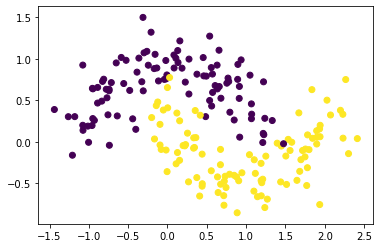

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
import torch

In [12]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor) 

In [34]:
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier, self).__init__() 
        self.fc1 = nn.Linear(2,3) 
        self.fc2 = nn.Linear(3,2) 
        
    def forward(self, x):
        x = self.fc1(x) 
        x = F.tanh(x) 
        x = self.fc2(x)
        return x
    
    def predict(self, x):
        pred = F.softmax(self.forward(x)) 
        ans = [] 
        for t in pred:
            if t[0] > t[1]:
                ans.append(0) 
            else:
                ans.append(1) 
        return torch.tensor(ans)         

In [20]:
# build network
import torch.nn as nn
import torch.nn.functional as F

In [21]:
# initilize model 

In [35]:
model = MyClassifier()
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [36]:
# number of epochs
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y) 
    losses.append(loss.item()) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

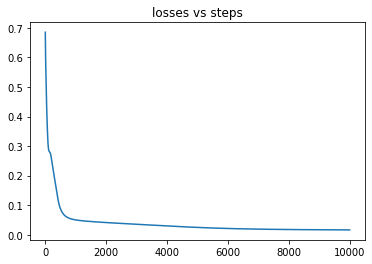

In [47]:
plt.plot(range(epochs), losses)
plt.title('losses vs steps')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X), y)

0.995

In [38]:
losses[9990:-1]

[0.01638146862387657,
 0.01638105697929859,
 0.01638062670826912,
 0.016380203887820244,
 0.01637978106737137,
 0.016379352658987045,
 0.016378941014409065,
 0.01637852005660534,
 0.016378097236156464]

In [43]:
model.predict(X)

tensor([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0])

In [40]:
y

tensor([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
# https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c